In [8]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [9]:
# Read Files
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")


In [10]:
# Part 1
# Combine two data 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [32]:
# Calculate total rides, drivers, fares based on city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [25]:
# Calculate average fare per ride and per driver
avg_fare_per_ride = total_fares  /total_rides
avg_fare_per_driver = total_fares / total_drivers
avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [33]:
# put above data in one dataframe
type_summary_df = pd.DataFrame({
        "Total Rides" : total_rides,
        "Total Drivers" : total_drivers,
        "Total Fares" : total_fares.map("${:,.2f}".format),
        "Average Fare per Ride" : avg_fare_per_ride.map("${:.2f}".format),
        "Average Fare per Driver" : avg_fare_per_driver.map("${:.2f}".format)})
type_summary_df.index.name = None
type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [34]:
# Part 2
# Rename columns
pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 
                                'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [35]:
# Set Date as datetime
pyber_data_df["Date"] = pd.to_datetime(pyber_data_df.Date)

In [36]:
# Set Date as index
pyber_date_index = pyber_data_df.set_index(["Date"])
pyber_date_index.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [47]:
# Choose only City Type and Fare columns
#pyber_date_index = pyber_date[["City Type","Fare"]]
pyber_date_index = pyber_date_index.copy()[["City Type","Fare"]]
pyber_date_index.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [39]:
# Check datatypes
pyber_date_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [40]:
# Slice date 2019-01-01 to 2019-04-28
pyber_date_index = pyber_date_index['2019-01-01':'2019-04-28']
pyber_date_index.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [42]:
pyber_date_index_pivot = pyber_date_index.pivot_table(index="Date",columns = "City Type", values = "Fare")
pyber_date_index_pivot.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [43]:
# resample in weekly bin
pyber_rural_wkly_fare = pyber_date_index_pivot.Rural.resample('W').sum()
pyber_suburban_wkly_fare = pyber_date_index_pivot.Suburban.resample('W').sum()
pyber_urban_wkly_fare = pyber_date_index_pivot.Urban.resample('W').sum()

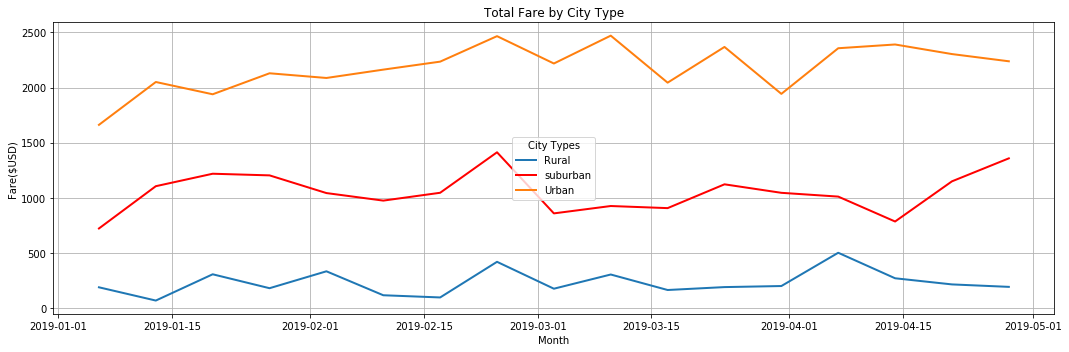

In [46]:
# plot the data
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pyber_rural_wkly_fare, label="Rural", linewidth=2)
ax.plot(pyber_suburban_wkly_fare, label="suburban", color="red", linewidth=2)
ax.plot(pyber_urban_wkly_fare, label="Urban", linewidth=2)
ax.set_xlabel("Month")
ax.set_ylabel("Fare($USD)")
ax.set_title("Total Fare by City Type")
ax.grid()
plt.legend(fontsize="10", mode="Expanded", loc="center", title="City Types")

# save the plot
plt.tight_layout()
plt.savefig("analysis/Challenge.png")
plt.show()